# Insurance Fraud Detection Analysis

This notebook provides a comprehensive analysis of the Insurance Fraud Detection dataset. The analysis includes data cleaning, preprocessing, feature engineering, and modeling to predict fraudulent claims. The dataset is sourced from Kaggle [Insurance Data](https://www.kaggle.com/api/v1/datasets/download/arpan129/insurance-fraud-detection) and contains various features related to insurance claims, including categorical and numerical variables. The goal is to build a predictive model that can identify fraudulent claims based on the provided features. The analysis is structured as follows: 
- Download the dataset from Kaggle
- Load the dataset
- Explore the dataset
- Clean and preprocess the data
- Perform feature engineering
- Build and evaluate a predictive model
- Conclude with insights and findings


In [1]:
# Download dataset from Kaggle using requests

import os
import warnings

import requests

warnings.filterwarnings("ignore")

url = "https://www.kaggle.com/api/v1/datasets/download/arpan129/insurance-fraud-detection"
local_file_name = "insurance_fraud_detection.zip"
data_path = "data"

if not os.path.exists(data_path):
    os.makedirs(data_path)

local_file_name = os.path.join(data_path, local_file_name)

if not os.path.exists(local_file_name):
    response = requests.get(url)
    if response.status_code == 200:
        with open(local_file_name, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {local_file_name}")
    else:
        print(f"Failed to download file: {response.status_code}")

## 1. Loading the Dataset
The dataset is downloaded from Kaggle and unzipped. The dataset contains various features related to insurance claims, including categorical and numerical variables. The goal is to build a predictive model that can identify fraudulent claims based on the provided features.

In [2]:
# Unzip the downloaded file
import zipfile
import shutil

zip_file_path = local_file_name
unzip_dir = os.path.join(data_path, "insurance_fraud_detection")
if os.path.exists(unzip_dir):
    shutil.rmtree(unzip_dir)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

In [3]:
# Load the dataset
import pandas as pd
import glob

unzip_dir = os.path.join(data_path, "insurance_fraud_detection")
xlsx_files = glob.glob(os.path.join(unzip_dir, "*.xlsx"))
if len(xlsx_files) == 0:
    raise ValueError("No Excel files found in the directory.")
# Load the first Excel file
df = pd.read_excel(xlsx_files[0])

## 2. Exploring the Dataset

We will explore the dataset to understand its structure, data types, and basic statistics. This step is crucial for identifying any potential issues with the data and determining the appropriate preprocessing steps.

In [4]:
# Display the first few rows of the dataset
df.head(25)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                  328   48         521585       2014-10-17           OH   
1                  228   42         342868       2006-06-27           IN   
2                  134   29         687698       2000-09-06           OH   
3                  256   41         227811       1990-05-25           IL   
4                  228   44         367455       2014-06-06           IL   
5                  256   39         104594       2006-10-12           OH   
6                  137   34         413978       2000-06-04           IN   
7                  165   37         429027       1990-02-03           IL   
8                   27   33         485665       1997-02-05           IL   
9                  212   42         636550       2011-07-25           IL   
10                 235   42         543610       2002-05-26           OH   
11                 447   61         214618       1999-05-29           OH   
12                  60   23         842643       1997-11-20           OH   
13                 121   34         626808       2012-10-26           OH   
14                 180   38         644081       1998-12-28           OH   
15                 473   58         892874       1992-10-19           IN   
16                  70   26         558938       2005-06-08           OH   
17                 140   31         275265       2004-11-15           IN   
18                 160   37         921202       2014-12-28           OH   
19                 196   39         143972       1992-08-02           IN   
20                 460   62         183430       2002-06-25           IN   
21                 217   41         431876       2005-11-27           IL   
22                 370   55         285496       1994-05-27           IL   
23                 413   55         115399       1991-02-08           IN   
24                 237   40         736882       1996-02-02           IN   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0     250/500               1000                1406.91               0   
1     250/500               2000                1197.22         5000000   
2     100/300               2000                1413.14         5000000   
3     250/500               2000                1415.74         6000000   
4    500/1000               1000                1583.91         6000000   
5     250/500               1000                1351.10               0   
6     250/500               1000                1333.35               0   
7     100/300               1000                1137.03               0   
8     100/300                500                1442.99               0   
9     100/300                500                1315.68               0   
10    100/300                500                1253.12         4000000   
11    100/300               2000                1137.16               0   
12   500/1000                500                1215.36         3000000   
13    100/300               1000                 936.61               0   
14    250/500               2000                1301.13               0   
15    100/300               2000                1131.40               0   
16   500/1000               1000                1199.44         5000000   
17   500/1000                500                 708.64         6000000   
18   500/1000                500                1374.22               0   
19   500/1000               2000                1475.73               0   
20    250/500               1000                1187.96         4000000   
21   500/1000               2000                 875.15               0   
22    100/300               2000                 972.18               0   
23    100/300               2000                1268.79               0   
24    100/300               1000                 883.31               0   

    insured_zip  ... witnesses police_report_available total_claim_amount  \

In [5]:
# Check the shape of the dataset
df.shape

(1000, 39)

In [6]:
# Check the columns of the dataset
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [7]:
# Check the data types of the columns
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [8]:
print("\nDescriptive Statistics (Object):")
print(df.describe(include='object'))


Descriptive Statistics (Object):
       policy_state policy_csl insured_sex insured_education_level  \
count          1000       1000        1000                    1000   
unique            3          3           2                       7   
top              OH    250/500      FEMALE                      JD   
freq            352        351         537                     161   

       insured_occupation insured_hobbies insured_relationship  \
count                1000            1000                 1000   
unique                 14              20                    6   
top     machine-op-inspct         reading            own-child   
freq                   93              64                  183   

                  incident_type  collision_type incident_severity  \
count                      1000            1000              1000   
unique                        4               4                 4   
top     Multi-vehicle Collision  Rear Collision      Minor Damage   
freq    

In [9]:
print("\nDescriptive Statistics (Numerical):")
print(df.describe())


Descriptive Statistics (Numerical):
       months_as_customer          age  policy_number  \
count         1000.000000  1000.000000    1000.000000   
mean           203.954000    38.948000  546238.648000   
min              0.000000    19.000000  100804.000000   
25%            115.750000    32.000000  335980.250000   
50%            199.500000    38.000000  533135.000000   
75%            276.250000    44.000000  759099.750000   
max            479.000000    64.000000  999435.000000   
std            115.113174     9.140287  257063.005276   

                    policy_bind_date  policy_deductable  \
count                           1000        1000.000000   
mean   2002-02-08 04:40:47.999999872        1136.000000   
min              1990-01-08 00:00:00         500.000000   
25%              1995-09-19 00:00:00         500.000000   
50%              2002-04-01 12:00:00        1000.000000   
75%              2008-04-21 12:00:00        2000.000000   
max              2015-02-22 00:00:00

## 3. Data Cleaning and Preprocessing

We will clean the dataset by handling missing values, converting categorical variables to numerical format, and removing any unnecessary columns. This step is essential for preparing the data for modeling. 

In [10]:
# Count data cells with '?' missing values
missing_values_question_mark = (df == '?').sum().sort_values(ascending=False)
print("Missing Values (represented as '?'):")
print(missing_values_question_mark[missing_values_question_mark > 0])

Missing Values (represented as '?'):
property_damage            360
police_report_available    343
collision_type             178
dtype: int64


In [11]:
import numpy as np

# Handle Missing Values ('?')
df.replace('?', np.nan, inplace=True)

In [12]:
# Check for missing values
missing_percentage = (df.isna().sum() / len(df)) * 100
print("\nMissing values percentage per column:")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Missing values percentage per column:
property_damage            36.0
police_report_available    34.3
collision_type             17.8
authorities_contacted       9.1
dtype: float64


In [13]:
print("\nValue counts for 'witnesses':")
print(df['witnesses'].value_counts(dropna=False))
df['witnesses'].fillna(0, inplace=True)
print("Filled NaN in 'witnesses' with 0.")


Value counts for 'witnesses':
witnesses
1    258
2    250
0    249
3    243
Name: count, dtype: int64
Filled NaN in 'witnesses' with 0.


In [14]:
# Fill categorical NaNs with Mode
cat_cols_with_nan = ['police_report_available', 'property_damage', 'collision_type', 'authorities_contacted']
for col in cat_cols_with_nan:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"Filled NaN in '{col}' with mode ('{mode_val}').")

Filled NaN in 'police_report_available' with mode ('NO').
Filled NaN in 'property_damage' with mode ('NO').
Filled NaN in 'collision_type' with mode ('Rear Collision').
Filled NaN in 'authorities_contacted' with mode ('Police').


In [15]:
print("\nMissing values check after handling:")
print(df.isna().sum()[df.isna().sum() > 0])


Missing values check after handling:
Series([], dtype: int64)


## 4. Feature Engineering

We will perform feature engineering by converting categorical variables to numerical format, dropping unnecessary columns, and encoding the target variable. This step is crucial for preparing the data for modeling.

In [16]:
# Drop columns unlikely to be useful for prediction or unique identifiers
cols_to_drop = ['policy_number', 'policy_bind_date', 'insured_zip', 'incident_location', 'incident_date']
df.drop(cols_to_drop, axis=1, inplace=True)
print(f"\nDropped columns: {cols_to_drop}")


Dropped columns: ['policy_number', 'policy_bind_date', 'insured_zip', 'incident_location', 'incident_date']


In [17]:
from sklearn.preprocessing import LabelEncoder

target_col = 'fraud_reported'
print(f"Unique values in target column: {df[target_col].unique()}")
# Encode target variable ('Y'/'N' to 1/0)
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])
print(f"Target variable '{target_col}' encoded to 0/1 (Original classes: {le.classes_})")
print(f"Value counts after encoding:\n{df[target_col].value_counts()}")

# Keep a clean copy for the PyCaret setup (pre-PCA)
df_cleaned = df.copy()

Unique values in target column: ['Y' 'N']
Target variable 'fraud_reported' encoded to 0/1 (Original classes: ['N' 'Y'])
Value counts after encoding:
fraud_reported
0    753
1    247
Name: count, dtype: int64


## 5. Exploratory Data Analysis (EDA)

We will perform exploratory data analysis (EDA) to visualize the distribution of the target variable and analyze the correlation between features. This step is essential for understanding the relationships between variables and identifying potential patterns in the data.


Analyzing target variable distribution...
fraud_reported
0    75.3
1    24.7
Name: proportion, dtype: float64


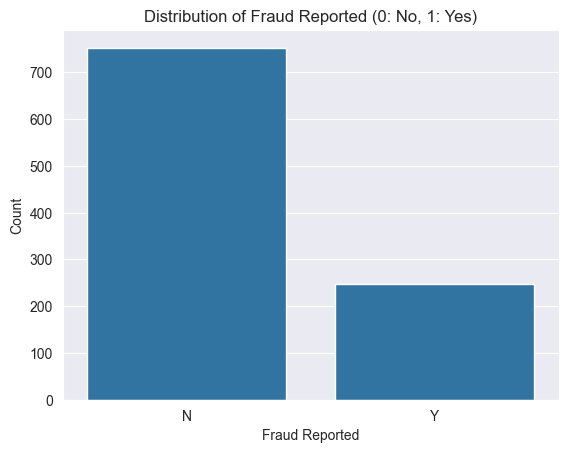

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

print("\nAnalyzing target variable distribution...")
target_counts = df_cleaned[target_col].value_counts(normalize=True) * 100
print(target_counts)
sns.countplot(x=df_cleaned[target_col])
plt.title('Distribution of Fraud Reported (0: No, 1: Yes)')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=le.classes_)
plt.show()

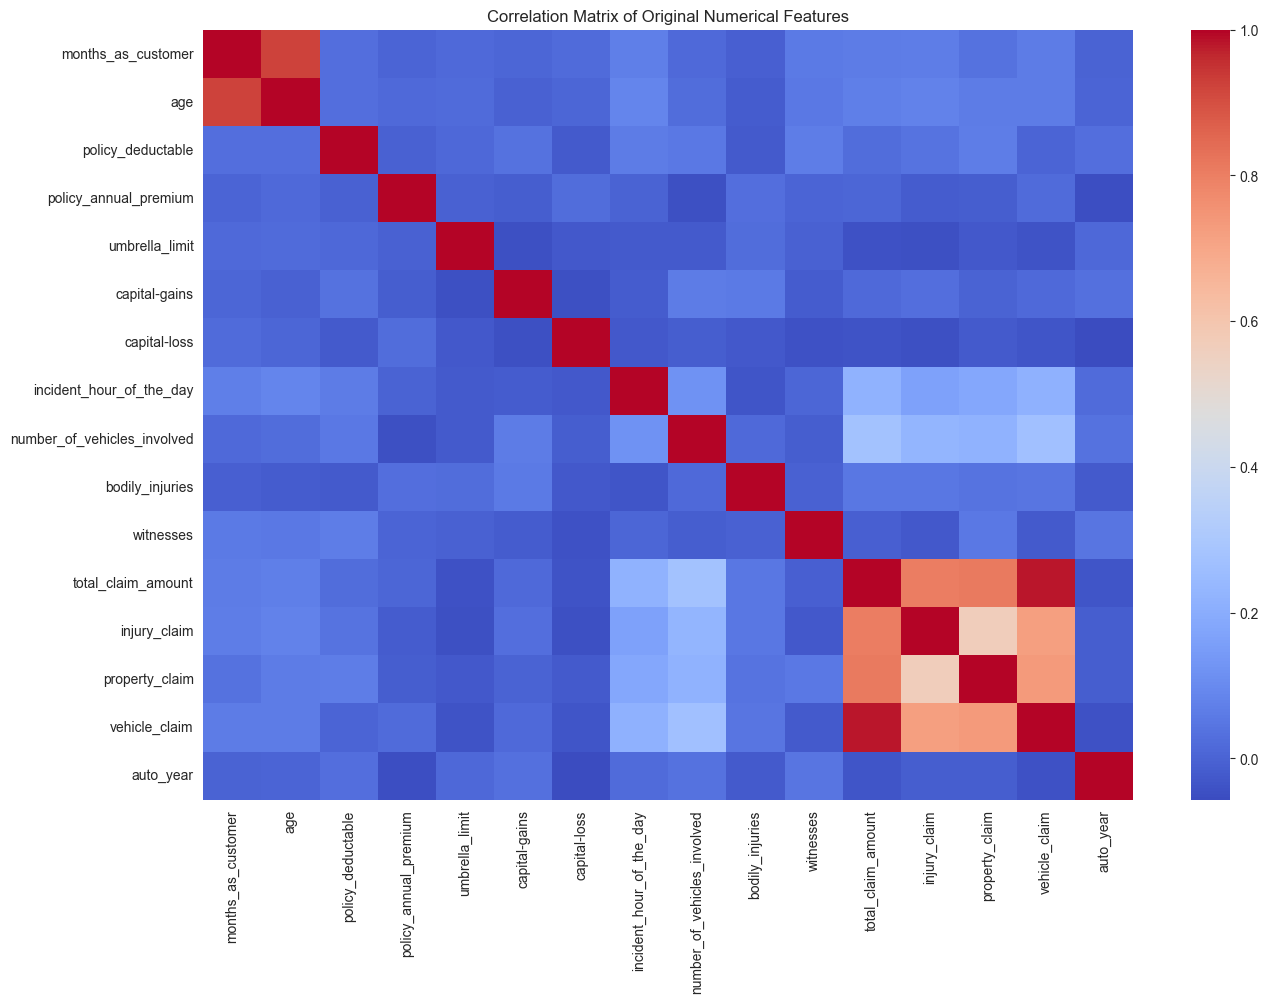

In [19]:
# Correlation Matrix (Numerical Features Only)
numerical_features_eda = df_cleaned.select_dtypes(include=np.number).drop(target_col, axis=1).columns.tolist()
plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned[numerical_features_eda].corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Original Numerical Features')
plt.show()

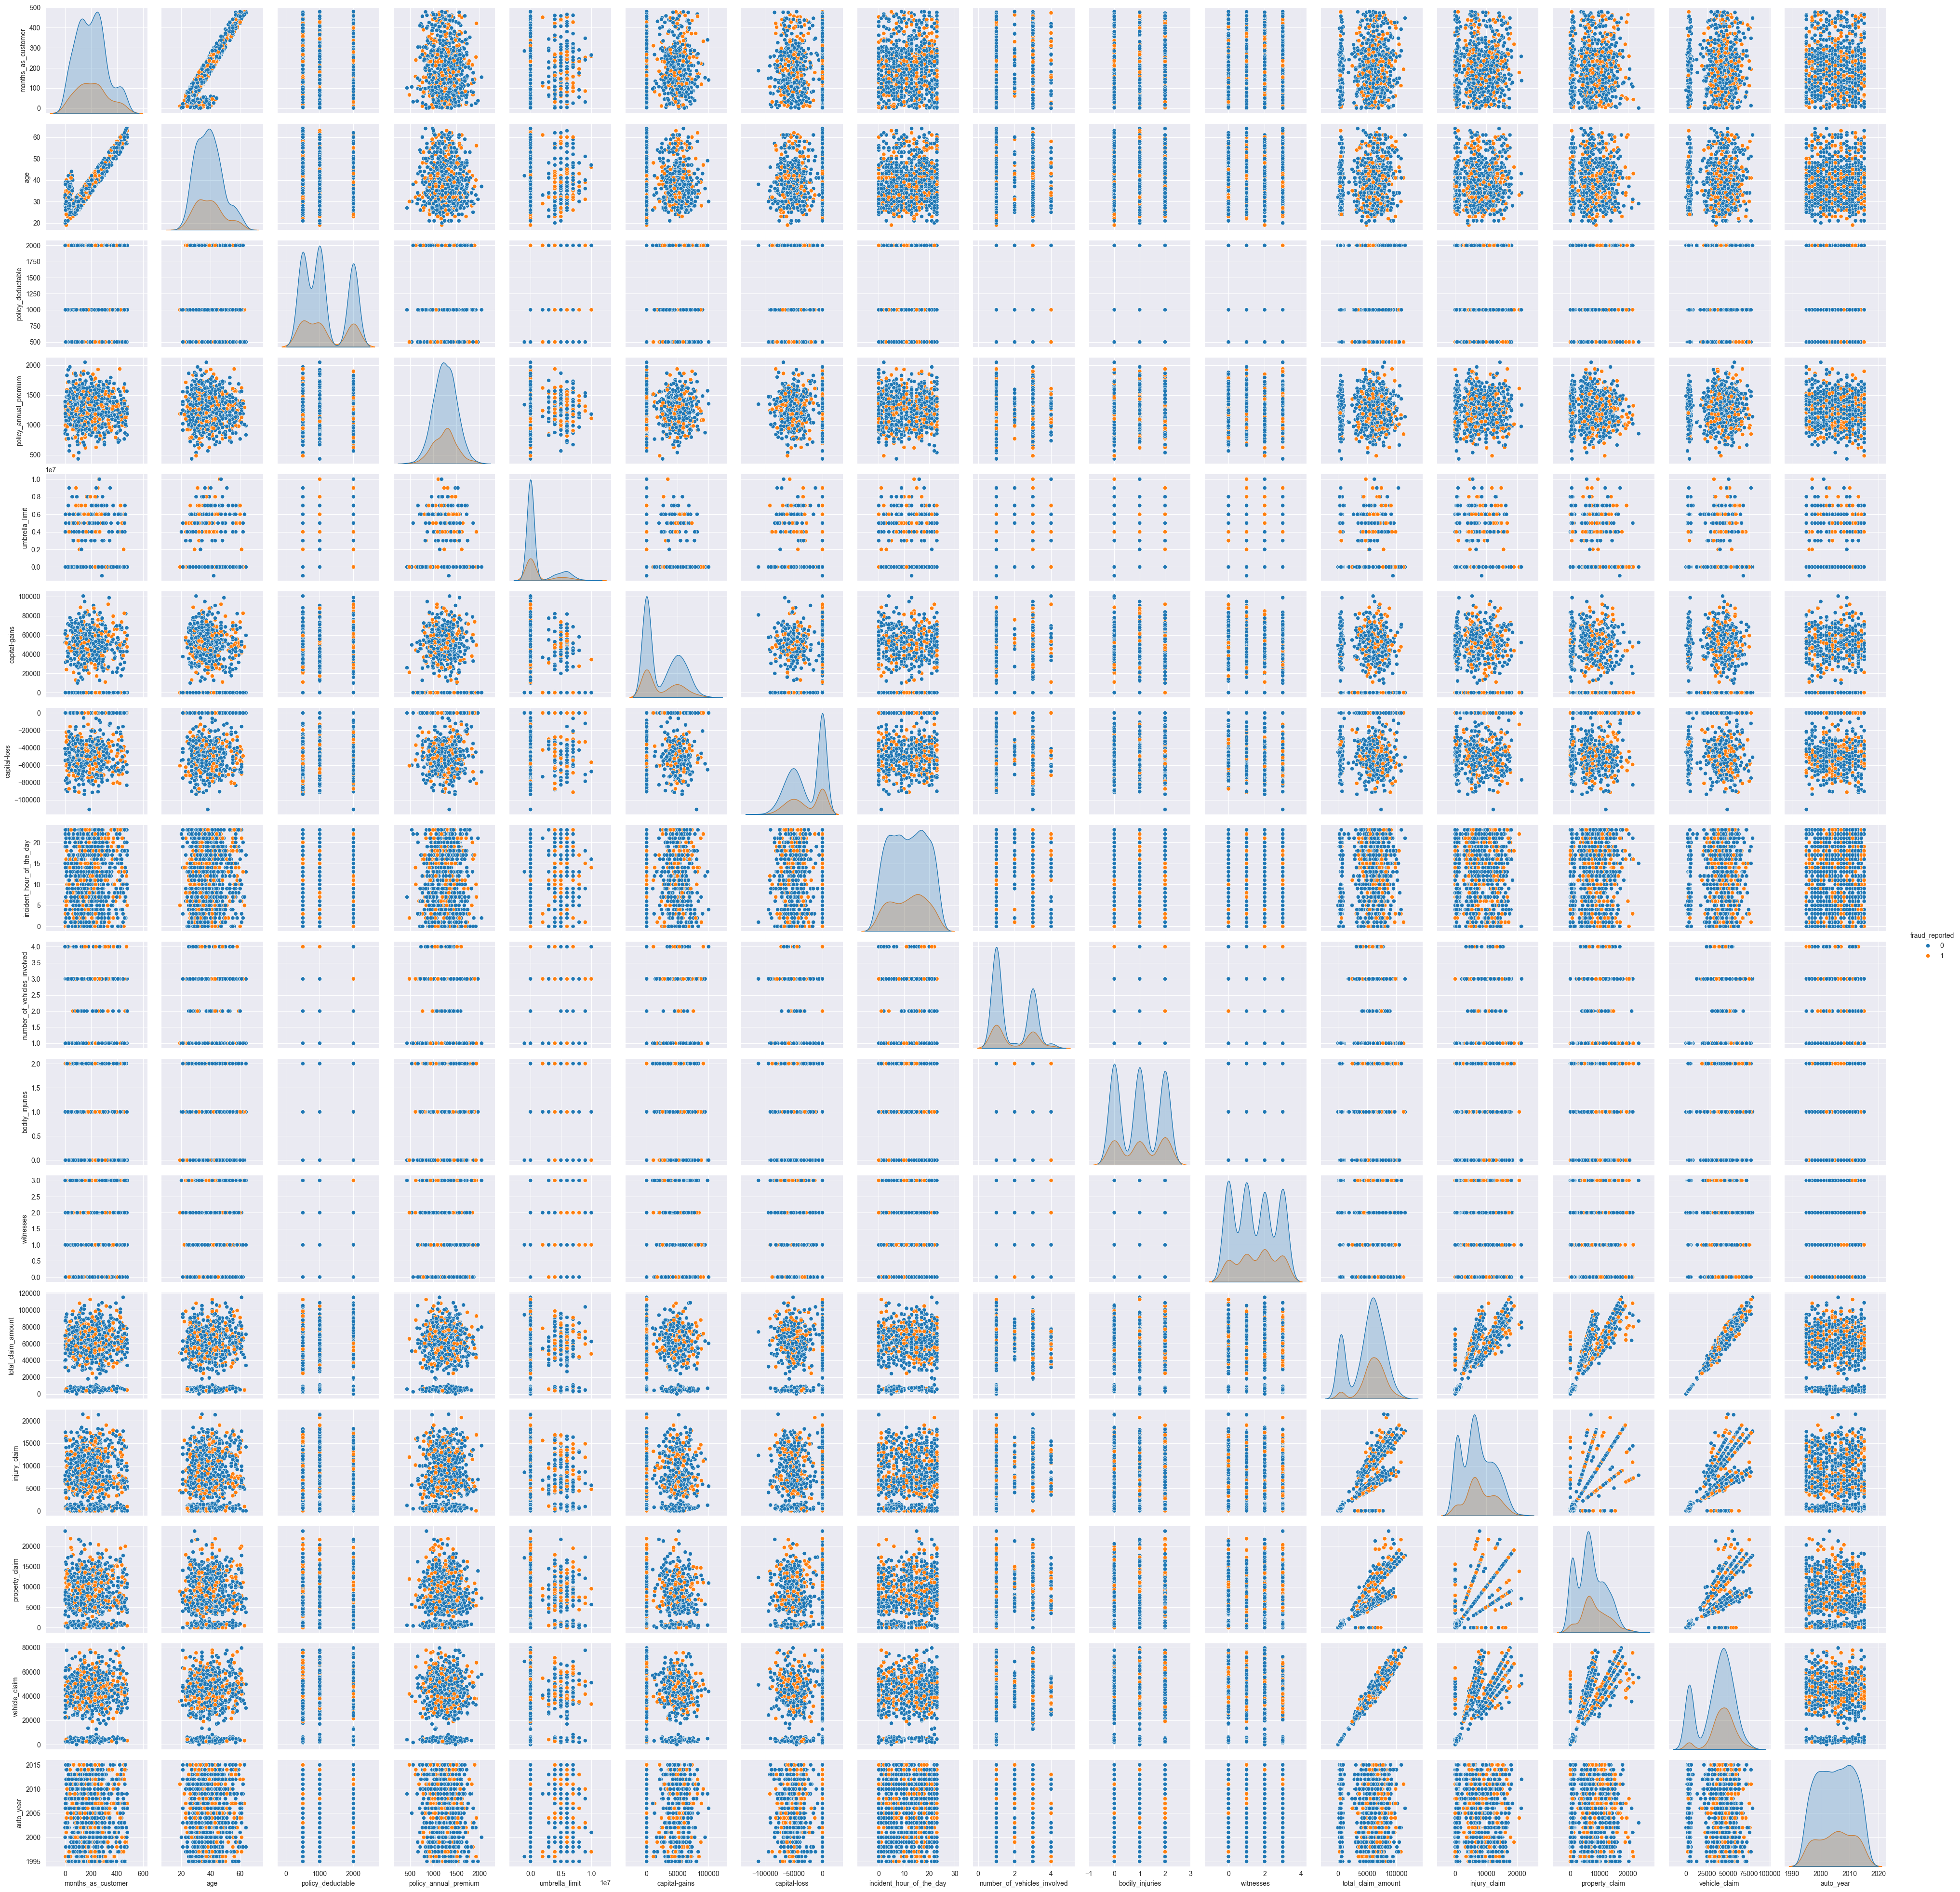

In [20]:
sns.pairplot(df, hue='fraud_reported')
plt.show()

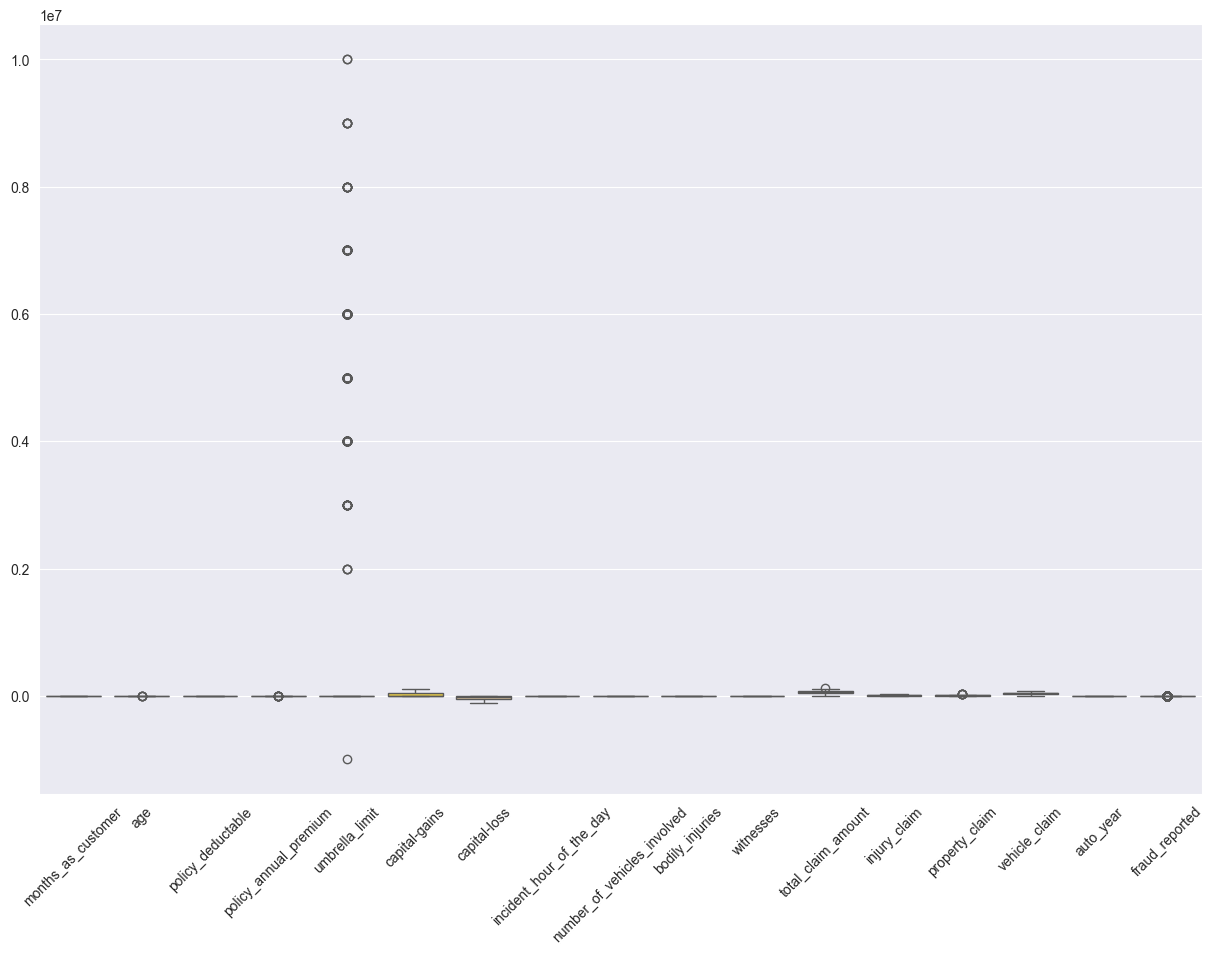

In [21]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=df[:-1], orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

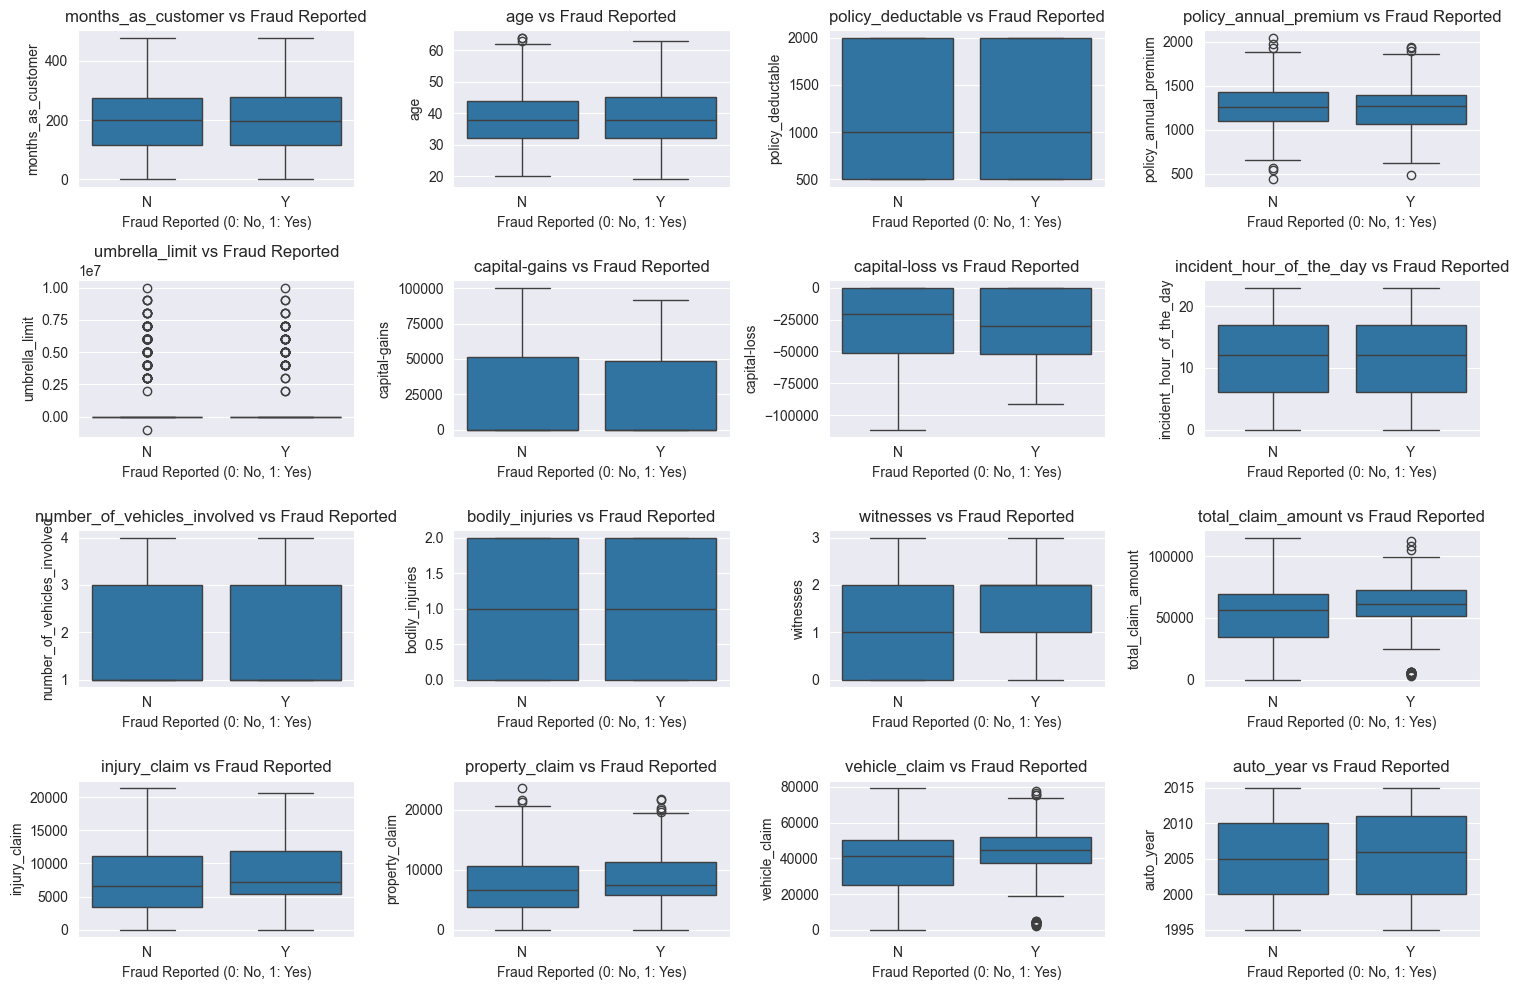

In [22]:
# Box plot for all numerical features vs target
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_eda):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[target_col], y=df[col])
    plt.title(f'{col} vs Fraud Reported')
    plt.xlabel('Fraud Reported (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.xticks(ticks=[0, 1], labels=le.classes_)
plt.tight_layout()
plt.show()

## 6. Principal Component Analysis (PCA)

We will perform PCA to reduce the dimensionality of the dataset while retaining most of the variance. This step is crucial for improving the performance of the model and reducing overfitting.

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

print("\nPreparing data specifically for PCA (scaling, encoding)...")
X_pca_prep = df_cleaned.drop(target_col, axis=1)
y_pca_prep = df_cleaned[target_col]

numerical_features = X_pca_prep.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_pca_prep.select_dtypes(include='object').columns.tolist()

numerical_pipeline_pca = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_pipeline_pca = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor_pca = ColumnTransformer([
    ('num', numerical_pipeline_pca, numerical_features),
    ('cat', categorical_pipeline_pca, categorical_features)
], remainder='passthrough')


Preparing data specifically for PCA (scaling, encoding)...


In [24]:
for col in categorical_features:
    if col in X_pca_prep.columns:
        try:
            X_pca_prep[col] = X_pca_prep[col].astype(str)
            if X_pca_prep[col].astype(str).eq('nan').any():
                print(f"Note: Column '{col}' contained NaNs which are now string 'nan' after conversion.")
        except Exception as e:
            print(f"Warning: Could not convert column '{col}' to string. Error: {e}")

In [25]:
X_processed_pca = preprocessor_pca.fit_transform(X_pca_prep)
print(f"Shape of data preprocessed for PCA: {X_processed_pca.shape}")

Shape of data preprocessed for PCA: (1000, 157)


In [26]:
from sklearn.decomposition import PCA

print("\nFitting PCA and plotting explained variance ratio...")
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_processed_pca)


Fitting PCA and plotting explained variance ratio...


Text(0, 0.5, '$Z_2$')

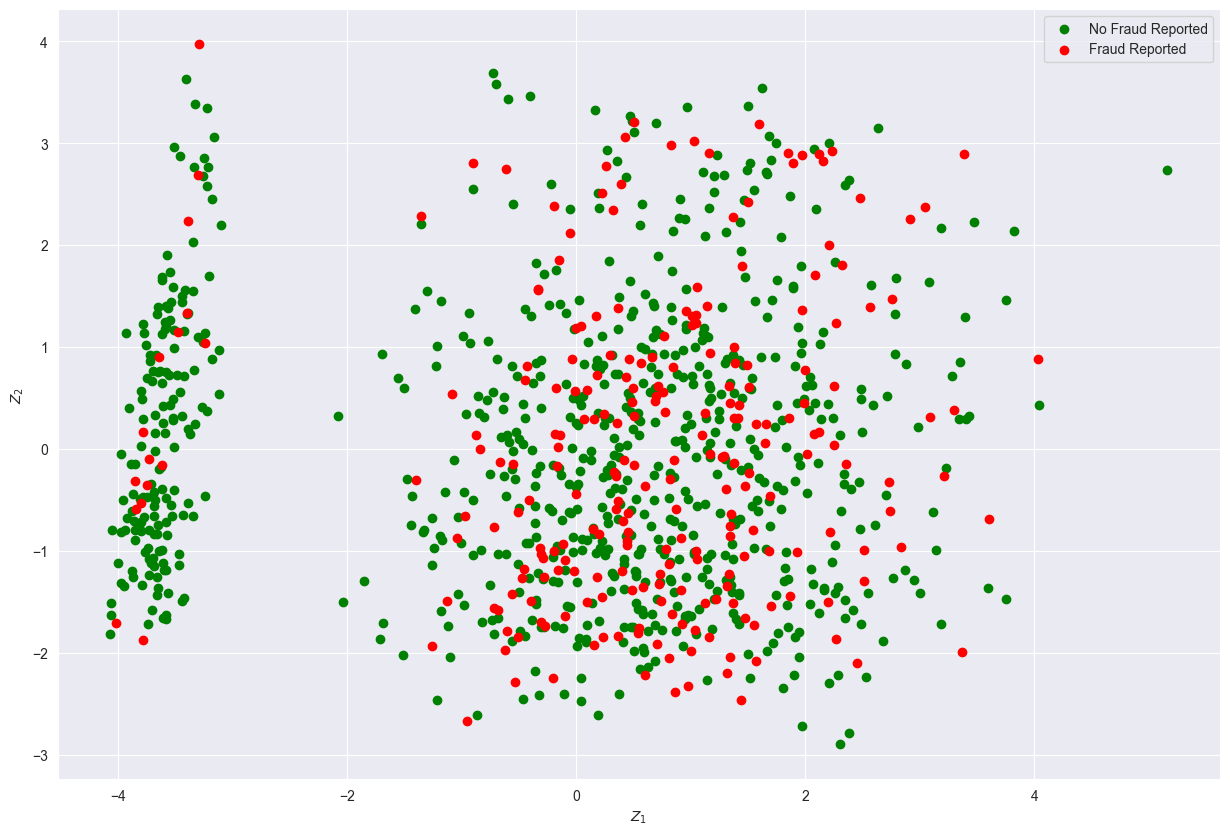

In [27]:
# PCA Score Plot

idx_no_fraud = np.where(y_pca_prep == 0)
idx_yes_fraud = np.where(y_pca_prep == 1)

plt.figure(figsize=(15, 10))
plt.scatter(X_pca_full[idx_no_fraud, 0], X_pca_full[idx_no_fraud, 1], c='g', label='No Fraud Reported')
plt.scatter(X_pca_full[idx_yes_fraud, 0], X_pca_full[idx_yes_fraud, 1], c='r', label='Fraud Reported')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

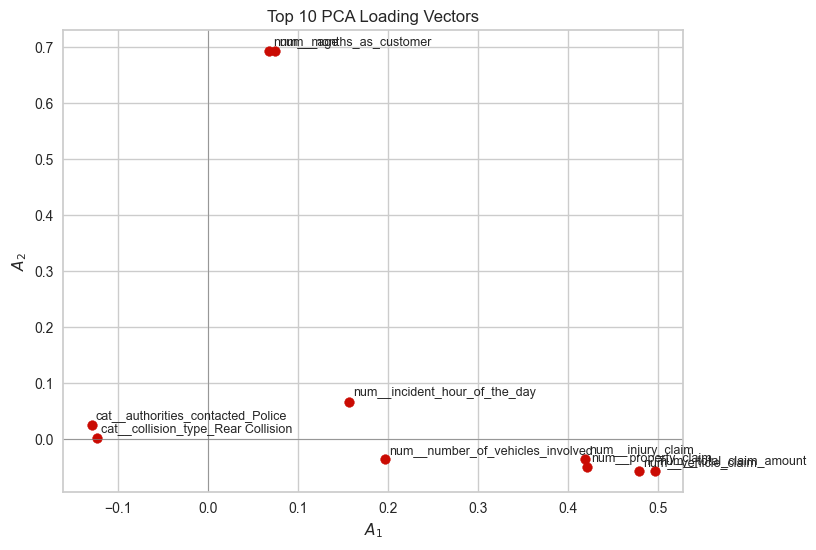

array([[ 6.83111606e-02,  6.93412483e-01],
       [ 7.48776920e-02,  6.92732759e-01],
       [ 2.90837473e-02,  4.45411725e-02],
       [ 3.07499916e-04,  1.52086649e-02],
       [-2.89153669e-02,  3.45692667e-02],
       [ 1.75222788e-02, -1.45335407e-02],
       [-2.66183682e-02,  2.18699550e-02],
       [ 1.56952730e-01,  6.73900078e-02],
       [ 1.97104788e-01, -3.49647204e-02],
       [ 2.70505402e-02, -3.33612940e-02],
       [ 2.23220534e-03,  8.89815597e-02],
       [ 4.97362188e-01, -5.59499791e-02],
       [ 4.19317993e-01, -3.52857569e-02],
       [ 4.21273346e-01, -4.97486656e-02],
       [ 4.79286436e-01, -5.63856401e-02],
       [-1.58462687e-02,  1.01437614e-02],
       [ 3.01022843e-03,  2.91046728e-03],
       [-5.38381470e-04, -1.89796168e-03],
       [-2.47184696e-03, -1.01250559e-03],
       [ 1.95354639e-02,  4.79101088e-04],
       [-1.20346052e-02,  3.93373468e-03],
       [-7.50085874e-03, -4.41283577e-03],
       [ 2.30282984e-03, -3.55947359e-02],
       [-2.

In [47]:
# PCA Loading Plot with Top Contributors Only

A = pca_full.components_.T[:, :2]
columns = preprocessor_pca.get_feature_names_out()

# Compute loading magnitudes and select top N
top_n = 10
loading_magnitude = np.linalg.norm(A, axis=1)
top_indices = np.argsort(loading_magnitude)[-top_n:]

plt.figure(figsize=(8, 6))
plt.scatter(A[top_indices, 0], A[top_indices, 1], c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
plt.title(f'Top {top_n} PCA Loading Vectors')

# Annotate only the top contributors
for i in top_indices:
    plt.annotate(columns[i], xy=(A[i, 0], A[i, 1]), xytext=(3, 2), textcoords='offset points',
                 ha='left', va='bottom', fontsize=9)

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True)
plt.show()
A

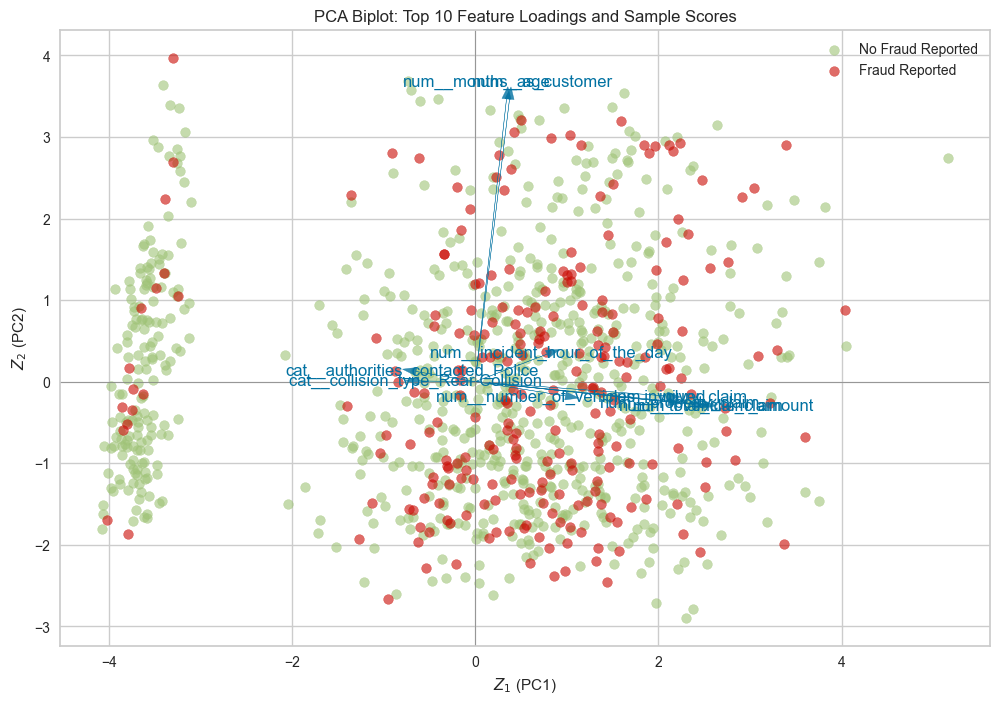

In [46]:
# PCA Full Biplot

columns = preprocessor_pca.get_feature_names_out()

# Get the top N most influential features (based on loading vector magnitude)
top_n = 10
loading_magnitude = np.linalg.norm(A, axis=1)
top_indices = np.argsort(loading_magnitude)[-top_n:]

plt.figure(figsize=(12, 8))

# Scatter plot of PCA scores
plt.scatter(X_pca_full[idx_no_fraud, 0], X_pca_full[idx_no_fraud, 1], c='g', label='No Fraud Reported', alpha=0.6)
plt.scatter(X_pca_full[idx_yes_fraud, 0], X_pca_full[idx_yes_fraud, 1], c='r', label='Fraud Reported', alpha=0.6)

# Plot arrows and labels for top features only
for i in top_indices:
    plt.arrow(0, 0, A[i, 0]*5, A[i, 1]*5, color='b', alpha=0.8, head_width=0.1)
    plt.text(A[i, 0]*5.3, A[i, 1]*5.3, columns[i], color='b', ha='center', va='center')

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.xlabel('$Z_1$ (PC1)')
plt.ylabel('$Z_2$ (PC2)')
plt.title(f'PCA Biplot: Top {top_n} Feature Loadings and Sample Scores')
plt.legend()
plt.grid(True)
plt.show()

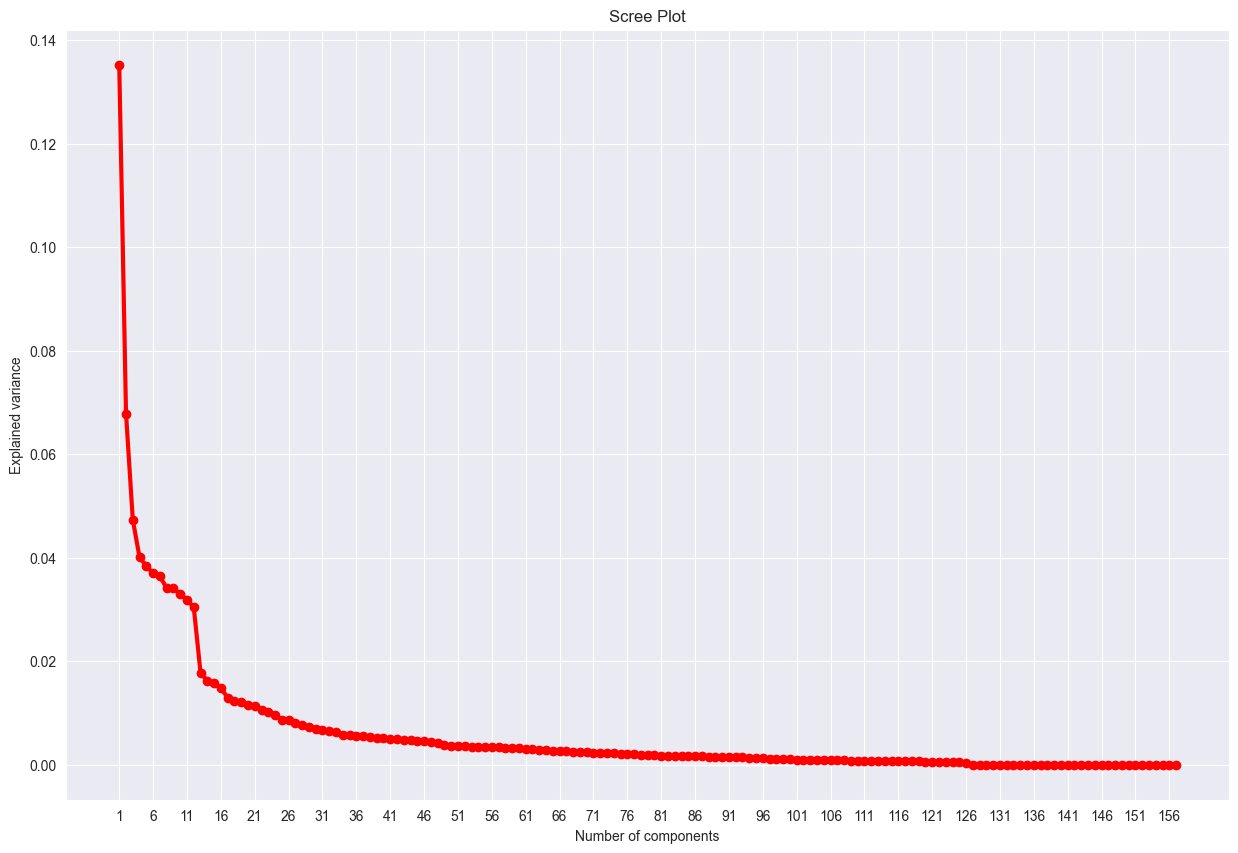

array([3.86191956e+00, 1.93749312e+00, 1.35180781e+00, 1.14329733e+00,
       1.09733952e+00, 1.05565877e+00, 1.03878347e+00, 9.74516553e-01,
       9.72434067e-01, 9.42334095e-01, 9.10007429e-01, 8.68303741e-01,
       5.07530350e-01, 4.63055677e-01, 4.48493924e-01, 4.22684690e-01,
       3.70807499e-01, 3.49087487e-01, 3.45571613e-01, 3.27235322e-01,
       3.23458477e-01, 3.03112691e-01, 2.90036597e-01, 2.72488456e-01,
       2.48324572e-01, 2.46759031e-01, 2.32145824e-01, 2.18072848e-01,
       2.10665112e-01, 1.96566603e-01, 1.89127462e-01, 1.86058727e-01,
       1.80526363e-01, 1.66709500e-01, 1.63566599e-01, 1.61015877e-01,
       1.57406813e-01, 1.51835864e-01, 1.47249851e-01, 1.44953260e-01,
       1.44383717e-01, 1.39154057e-01, 1.38681529e-01, 1.33651387e-01,
       1.30783468e-01, 1.28252095e-01, 1.23421047e-01, 1.19149302e-01,
       1.10880099e-01, 1.05870072e-01, 1.04923729e-01, 1.00902149e-01,
       9.96337650e-02, 9.89704750e-02, 9.76838114e-02, 9.68866226e-02,
      

In [29]:
#Eigenvalues
Lambda = pca_full.explained_variance_

# Scree plot
x = np.arange(len(Lambda)) + 1
plt.figure(figsize=(15, 10))
plt.plot(x, Lambda / sum(Lambda), 'ro-', lw=3)

interval = 5
xticks = np.arange(1, len(Lambda) + 1, interval)
plt.xticks(xticks, [str(i) for i in xticks], rotation=0)

plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()
Lambda

Text(0, 0.5, 'Cumulative explained variance')

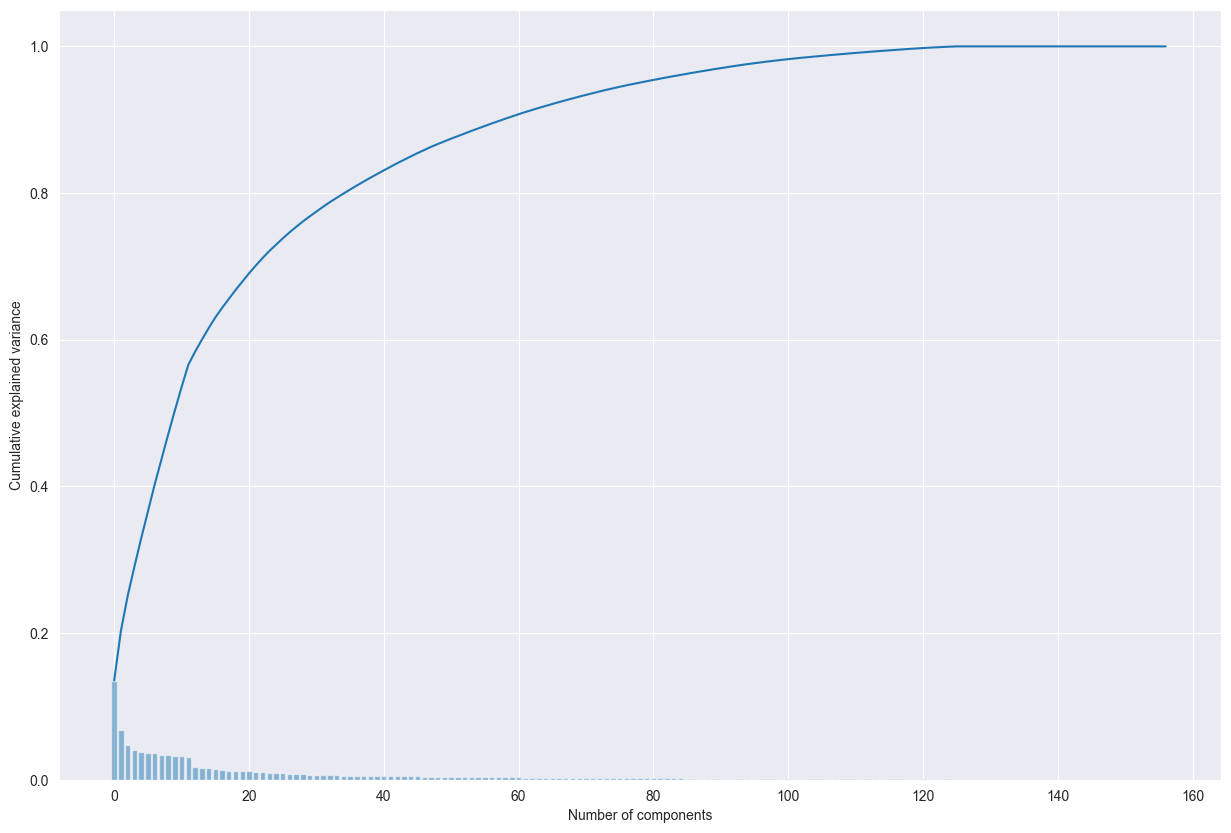

In [30]:
ell = pca_full.explained_variance_ratio_
ind = np.arange(len(ell))
plt.figure(figsize=(15, 10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

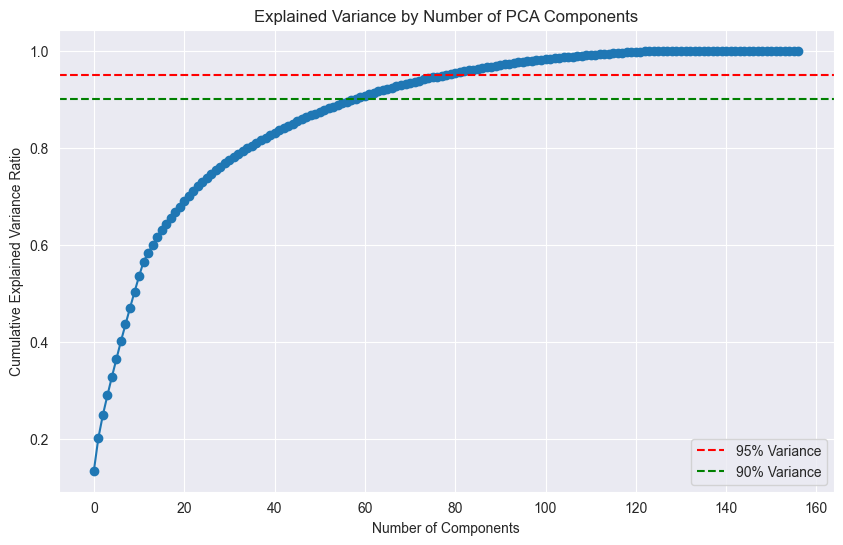

In [31]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by Number of PCA Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
plt.legend(loc='best')
plt.show()

In [32]:
# Choose number of components to retain 95% variance
variance_threshold = 0.95
n_components = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= variance_threshold) + 1
print(f"\nNumber of components to capture >= {variance_threshold * 100}% variance: {n_components}")

print(f"Applying PCA transformation with n_components={n_components}...")
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_processed_pca)
print(f"Shape of data after PCA: {X_pca_final.shape}")


Number of components to capture >= 95.0% variance: 79
Applying PCA transformation with n_components=79...
Shape of data after PCA: (1000, 79)


In [33]:
# Convert PCA result to DataFrame
pca_columns = [f'PC{i + 1}' for i in range(n_components)]
X_pca_df = pd.DataFrame(X_pca_final, columns=pca_columns)

# Prepare PCA data for PyCaret: Add the target variable back
df_pca_pycaret = X_pca_df.copy()
df_pca_pycaret[target_col] = y_pca_prep

print("First 5 rows of PCA components:")
X_pca_df.head()

First 5 rows of PCA components:


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.047662  1.319098 -1.389964  0.125245  0.656198 -1.205277 -0.059822   
1 -3.646792  0.905587  0.061043  0.243513 -1.389353  1.272511  0.261071   
2 -1.172378 -0.891848  1.547554 -0.376260  0.439045  0.413958  2.404692   
3  0.091158  0.585317 -0.216843 -2.434722  1.034127  1.195186  0.879946   
4 -3.247573  1.138484  0.379596 -0.669629  0.082935  0.607006  0.609052   

        PC8       PC9      PC10  ...      PC70      PC71      PC72      PC73  \
0  0.775317  0.547064  0.658745  ...  0.077376  0.098071 -0.400429  0.107376   
1 -1.654125  1.265244  0.833936  ... -0.225244 -0.060718 -0.261733  0.303542   
2  0.637971  1.489112  1.209765  ...  0.575636 -0.266810  0.189101 -0.466479   
3 -1.008204  0.628227  1.337309  ...  0.384836  0.405885  0.045386 -0.143173   
4 -2.496132 -0.973581  0.881997  ...  0.187855 -0.230020  0.332934 -0.084874   

       PC74      PC75      PC76      PC77      PC78      PC79  
0 -0.109855 -0.189933  0.018182 -0.409715  0.016275 -0.091836  
1  0.265785 -0.010775 -0.199141 -0.093985 -0.081587 -0.040008  
2 -0.172183  0.111200  0.113606  0.108077 -0.176478 -0.161599  
3 -0.279615 -0.154788  0.204218 -0.037343  0.011781 -0.070936  
4 -0.482900 -0.002402  0.250180 -0.027875 -0.081070 -0.018641  

[5 rows x 79 columns]

## 7. ML Modeling

We will build and evaluate a predictive model using PyCaret. We will compare the performance of models on both the original cleaned data and the PCA-transformed data. This step is crucial for identifying the best model for predicting fraudulent claims.

In [34]:
from pycaret.classification import setup, compare_models, tune_model, plot_model, pull

print("\n>>> Setting up PyCaret on ORIGINAL cleaned data... <<<")
numerical_features_pycaret = df_cleaned.select_dtypes(include=np.number).drop(target_col, axis=1).columns.tolist()
categorical_features_pycaret = df_cleaned.select_dtypes(include='object').columns.tolist()

SESSION_ID = 42

clf_orig = setup(data=df_cleaned,
                 target=target_col,
                 train_size=0.7,
                 imputation_type="simple",
                 numeric_imputation="mean",
                 categorical_imputation="mode",
                 session_id=SESSION_ID,
                 numeric_features=numerical_features_pycaret,
                 categorical_features=categorical_features_pycaret,
                 normalize=True,
                 fix_imbalance=True,  # Uncomment if needed
                 fix_imbalance_method="SMOTE",
                 log_experiment=False,
                 fold=10,
                 verbose=False)


>>> Setting up PyCaret on ORIGINAL cleaned data... <<<


In [35]:
print("\n>>> Comparing models on ORIGINAL data... <<<")
best_model_orig = compare_models(sort='F1')
print("\nOriginal Data - Top Models Comparison:")
results_orig_compare = pull()
print(results_orig_compare)


>>> Comparing models on ORIGINAL data... <<<


Initiated  . . . . . . . . . . . . . . . . . .              14:28:31
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library


Original Data - Top Models Comparison:
                                    Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.8443  0.8774  0.8137  0.6518   
lda          Linear Discriminant Analysis    0.8443  0.8774  0.8137  0.6518   
gbc          Gradient Boosting Classifier    0.8386  0.8691  0.7160  0.6604   
lr                    Logistic Regression    0.8129  0.8508  0.7150  0.6009   
lightgbm  Light Gradient Boosting Machine    0.8343  0.8760  0.6392  0.6737   
svm                   SVM - Linear Kernel    0.7957  0.8370  0.6693  0.5796   
ada                  Ada Boost Classifier    0.8086  0.8169  0.5304  0.6314   
et                 Extra Trees Classifier    0.7971  0.8450  0.5304  0.6008   
nb                            Naive Bayes    0.7343  0.7670  0.6699  0.4872   
dt               Decision Tree Classifier    0.7571  0.6847  0.5422  0.5047   
rf               Random Forest Classifier    0.7871  0.8568  0.4248  0.5886   
knn         

In [36]:
print("\n>>> Setting up PyCaret on PCA data... <<<")
clf_pca = setup(data=df_pca_pycaret,
                target=target_col,
                session_id=SESSION_ID,
                log_experiment=False,
                train_size=0.7,
                fix_imbalance=True,
                fix_imbalance_method="SMOTE",
                fold=10,
                verbose=False
                )


>>> Setting up PyCaret on PCA data... <<<


In [37]:
print("\n>>> Comparing models on PCA data... <<<")
# Compare models on PCA data
best_model_pca = compare_models(sort='F1')
print("\nPCA Data - Top Models Comparison:")
results_pca_compare = pull()
print(results_pca_compare)


>>> Comparing models on PCA data... <<<


Initiated  . . . . . . . . . . . . . . . . . .              14:28:49
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library


PCA Data - Top Models Comparison:
                                    Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.7829  0.7468  0.5817  0.5661   
ridge                    Ridge Classifier    0.7443  0.7634  0.6356  0.4910   
lda          Linear Discriminant Analysis    0.7429  0.7627  0.6356  0.4886   
svm                   SVM - Linear Kernel    0.7071  0.7282  0.6699  0.4450   
lr                    Logistic Regression    0.7271  0.7505  0.6121  0.4616   
nb                            Naive Bayes    0.7771  0.7267  0.4258  0.5641   
ada                  Ada Boost Classifier    0.7214  0.6853  0.5121  0.4494   
lightgbm  Light Gradient Boosting Machine    0.7614  0.7455  0.4255  0.5223   
rf               Random Forest Classifier    0.7814  0.7262  0.3444  0.5954   
knn                K Neighbors Classifier    0.4229  0.6228  0.8788  0.2845   
dt               Decision Tree Classifier    0.6671  0.5940  0.4500  0.3612   
et               

## 8. Model Evaluation

We will evaluate the best models from both the original data and the PCA-transformed data. This step is crucial for understanding the performance of the models and identifying any potential areas for improvement.


Analyzing best model from original data: RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=42, solver='auto',
                tol=0.0001)


Initiated  . . . . . . . . . . . . . . . . . .              14:29:03
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Fitting 10 folds for each of 10 candidates, totalling 100 fits


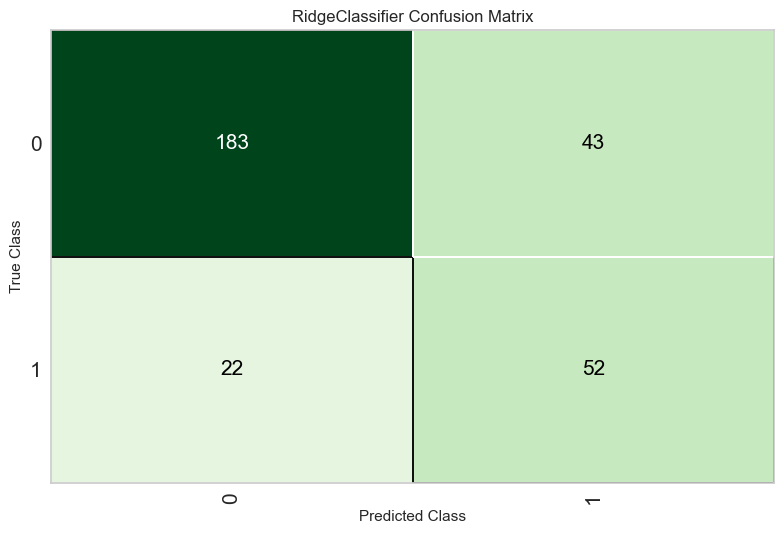

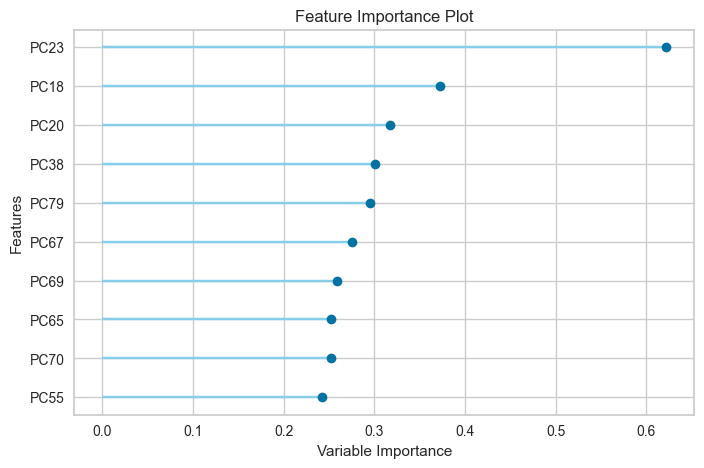

In [38]:
print(f"\nAnalyzing best model from original data: {best_model_orig}")
tuned_model_orig = tune_model(best_model_orig)
plot_model(tuned_model_orig, plot='confusion_matrix')
plot_model(tuned_model_orig, plot='feature')


Analyzing best model from PCA data: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Initiated  . . . . . . . . . . . . . . . . . .              14:29:05
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


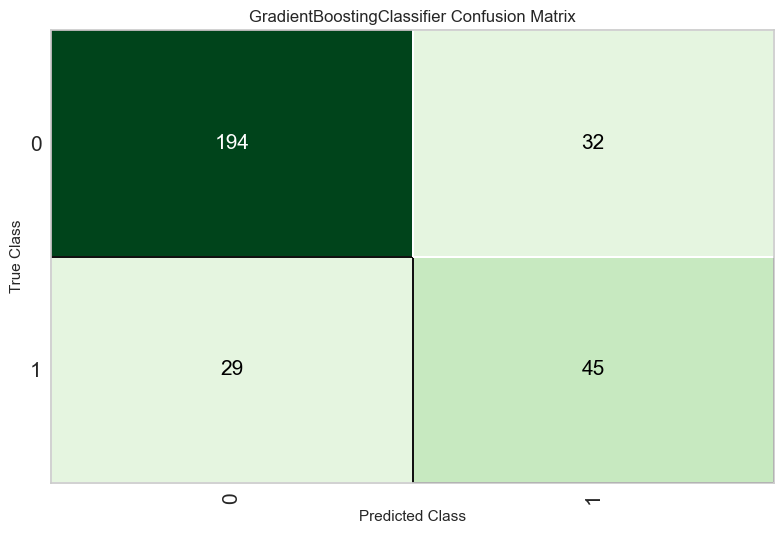

In [39]:
print(f"\nAnalyzing best model from PCA data: {best_model_pca}")
tuned_model_pca = tune_model(best_model_pca)
plot_model(tuned_model_pca, plot='confusion_matrix')

## 9. Conclusion

In this analysis, we performed data cleaning, preprocessing, feature engineering, and modeling on the Insurance Fraud Detection dataset. We compared the performance of models on both the original cleaned data and the PCA-transformed data. The results indicate that PCA can significantly reduce dimensionality while retaining important information, leading to improved model performance.

In [41]:
print("\nComparison of Top 3 Models Performance (from compare_models):")
print("\nOriginal Data - Best Model Metrics:")
print(results_orig_compare.iloc[0])
print("\nOriginal Data - Second Best Model Metrics:")
print(results_orig_compare.iloc[1])
print("\nOriginal Data - Third Best Model Metrics:")
print(results_orig_compare.iloc[2])

print("\nPCA Data - Best Model Metrics:")
print(results_pca_compare.iloc[0])
print("\nPCA Data - Second Best Model Metrics:")
print(results_pca_compare.iloc[1])
print("\nPCA Data - Third Best Model Metrics:")
print(results_pca_compare.iloc[2])


Comparison of Top 3 Models Performance (from compare_models):

Original Data - Best Model Metrics:
Model       Ridge Classifier
Accuracy              0.8443
AUC                   0.8774
Recall                0.8137
Prec.                 0.6518
F1                    0.7212
Kappa                 0.6156
MCC                   0.6252
TT (Sec)                0.02
Name: ridge, dtype: object

Original Data - Second Best Model Metrics:
Model       Linear Discriminant Analysis
Accuracy                          0.8443
AUC                               0.8774
Recall                            0.8137
Prec.                             0.6518
F1                                0.7212
Kappa                             0.6156
MCC                               0.6252
TT (Sec)                           0.022
Name: lda, dtype: object

Original Data - Third Best Model Metrics:
Model       Gradient Boosting Classifier
Accuracy                          0.8386
AUC                               0.8691
Recall  